 **DIDA 325 Final Project - Energy Dataset:
Mimansa Dahal, Saki Endo, Tim (Tianqi)Jiang, & Kristina Donders**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
energy = pd.read_excel("/content/ENB2012_data.xlsx")
energy.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


##**Checkpoint 1**



## 1.What is your imagined position on this dataset? Who has hired you? What are their goals?
Scenario 1:

*  We have been hired by a couple looking to build the most energy-efficient home possible. They live in a cooler climate and want to optimize the amount of energy that is being used to build their home
* Less energy used for heating = cheaper energy bill


## 2.What is the origin of the dataset? Who recorded the data?


*   This data was collected by Athanasios Tsanas (University of Oxford) and Angeliki Xifara (Cardiff University)

    -   “Accurate quantitative estimation of energy performance of residential buildings using statistical machine learning tools” 6/1/2012

* These researchers sought to use statistical machine-learning tools to estimate the energy performance of residential buildings


*   This data was generated in a controlled way, and all the data was collected via the same process:

     -  “Taking the elementary cube (3.5 × 3.5 × 3.5) we generated 12 building forms where each building form is composed of 18 elements (elementary cubes). The simulated buildings were generated using Ecotect. All the buildings have the same volume, which is 771.75 m3, but different surface areas and dimensions. The materials used for each of the 18 elements are the same for all building forms.”


## 3. Explain what all of your remaining columns represent, and whether they are text, numeric, or categorical in nature.


*   **X1 = Relative Compactness**: It measures how compact a building is, a better compactness leads to better energy efficiency. Numeric data

* **X2 = Surface Area**: The total surface area of the building, large surface area could lead to higher energy needs. Numeric data


*  **X3 = Wall Area**: The area covered by the wall, large wall area affects heat insulation. Numeric data.

*  **X4 = Roof Area**: The area covered by the roof, roof area could affect heat transfer and insulation. Numeric data.


*   **X5 = Overall Height**: The height of the building, the higher the building, the more energy is required. Numeric data.

*   **X6 = Orientation**: Building’s orientation e.g. (east, north, south, west). Building’s orientation can affect the sun exposure, the building which faces east usually gets more sun exposure therefore less heating needs. Categorical data.


* **X7 = Glazing Area**: Areas covered by windows, doors. This could affect the heating and cooling efficiency due to the low insulation. Numeric data

* **X8 = Glazing Area Distribution**: This distribution of windows and doors in a building. The side with more windows could lead to more sun exposure, less heating needs. Numeric data.


*   **Y1 = Heading load**: The amount of energy needed to heat a building. Numeric data

*   **Y2 = Cooling load**: The amount of energy needed to cool a building. Numeric data


##**Checkpoint 2**

addressing checkpoint 1: we are modifying our scenario to make it broader.

* new scenario : We are a government agency focusing on increasing energy efficiency. We are researching different types of buildings to see which types of buildings use the least amount of energy and which types of buildings use the most energy. We want to find the ideal characteristics to create more energy efficient buildings.


Our 4 questions:

* How accurately can we predict the heating and cooling load based on the data we have about the buildings? (linear regression)


* What is the relationship between surface area, orientation and the cooling load of a building (data visualization with orientation separated by hue; matplotlib/seaborn)


* What is the relationship between glazing area and energy efficiency (data visualization of how glazing area effects both the heating and cooling load with line graphs)


* What is the ideal wall area for optimal heating and cooling load? (we find the midpoint of the heating and cooling load, and take the average wall area of the values that are less than the midpoint; in this case, the lower the number, the more energy efficient) - (data manipulation)


##**Checkpoint 3:**

* nothing to address from checkpoint 2

* our analysis for our research questions:

####**1. How accurately can we predict the heating and cooling load based on the data we have about the buildings? (linear regression)**


In [ ]:
energy.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [ ]:
filtered_energy= energy.drop(['X6'],axis=1)
filtered_energy

,X1,X2,X3,X4,X5,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,0.4,5,16.48,16.61


In [ ]:
energy_cleaned = filtered_energy.dropna()
energy_cleaned

,X1,X2,X3,X4,X5,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,0.4,5,16.48,16.61


In [ ]:
X= energy_cleaned[['X1', 'X2', 'X3','X4','X5','X7','X8']]
y= energy_cleaned['Y1']

X = pd.get_dummies(X, drop_first=True).astype("float32")
X.head()

,X1,X2,X3,X4,X5,X7,X8
0,0.98,514.5,294.0,110.25,7.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,0.0,0.0


Linear Regression: Heating (Y1)

In [ ]:
X = sm.tools.tools.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1387.
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:59:29   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3839.
Df Residuals:                     761   BIC:                             3871.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.9316     19.019      4.413      0.0

Result: R-squared = 0.916 suggests that the independent variables have high predictive power for dependent variable. The regression line fits the model very well. For each independent variables, the p values are less than 0.05 suggests that every independent variables have significant influence on dependent variable.

In [ ]:
X= energy_cleaned[['X1', 'X2', 'X3','X4','X5','X7','X8']]
y= energy_cleaned['Y2']

X = pd.get_dummies(X, drop_first=True).astype("float32")
X.head(50)

,X1,X2,X3,X4,X5,X7,X8
0,0.98,514.5,294.0,110.25,7.0,0.0,0.0
1,0.98,514.5,294.0,110.25,7.0,0.0,0.0
2,0.98,514.5,294.0,110.25,7.0,0.0,0.0
3,0.98,514.5,294.0,110.25,7.0,0.0,0.0
4,0.90,563.5,318.5,122.50,7.0,0.0,0.0
5,0.90,563.5,318.5,122.50,7.0,0.0,0.0
6,0.90,563.5,318.5,122.50,7.0,0.0,0.0
7,0.90,563.5,318.5,122.50,7.0,0.0,0.0
8,0.86,588.0,294.0,147.00,7.0,0.0,0.0
9,0.86,588.0,294.0,147.00,7.0,0.0,0.0


Linear Regression: Cooling (Y2)

In [ ]:
X = sm.tools.tools.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y2   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     1002.
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        16:59:29   Log-Likelihood:                -1980.0
No. Observations:                 768   AIC:                             3974.
Df Residuals:                     761   BIC:                             4007.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.6709     20.767      4.703      0.0

Result: R-squared = 0.888 suggests that the independent variables have high predictive power for cooling. The regression line fits the model very well. For each independent variables except X8, the p values are less than 0.05 suggests that every independent variables have significant influence on cooling, except X8 that has no significant influence on cooling.

####**2. What is the relationship between surface area, orientation and the cooling/heating load of a building (data visualization with orientation separated by hue; matplotlib/seaborn)**

<ipython-input-10-020a12ed9a94>:1: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(energy,x="X2",y="Y2", hue="X6",palette=sns.color_palette("Set2"))


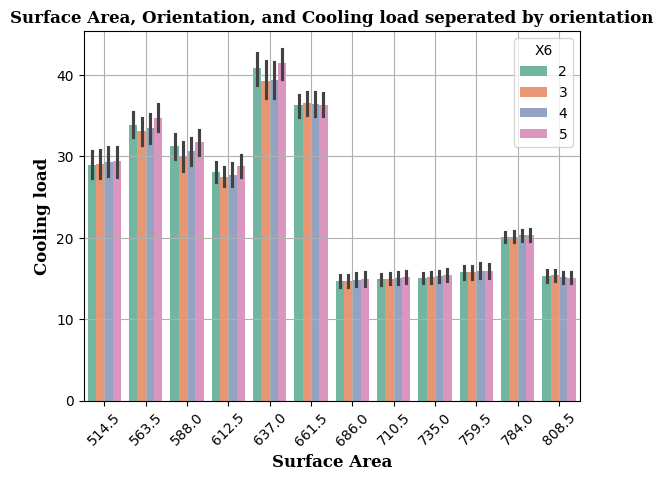

In [ ]:
sns.barplot(energy,x="X2",y="Y2", hue="X6",palette=sns.color_palette("Set2"))
newfont = {'fontname': 'serif', 'fontsize': 12,'fontweight': 'bold'}
plt.title('Surface Area, Orientation, and Cooling load seperated by orientation',fontdict=newfont)
plt.xlabel("Surface Area",fontdict=newfont)
plt.ylabel("Cooling load",fontdict=newfont)
plt.xticks(rotation=45)
plt.grid()
plt.show()

<ipython-input-11-0b7bb7e60f83>:1: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(energy,x="X2",y="Y1", hue="X6",palette=sns.color_palette("Set2"))


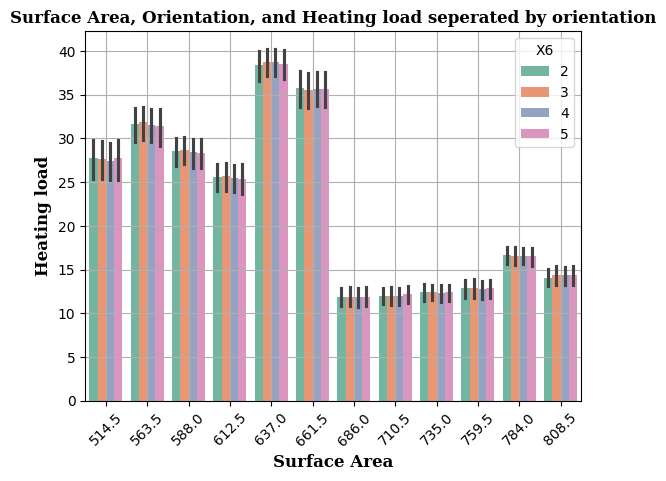

In [ ]:
sns.barplot(energy,x="X2",y="Y1", hue="X6",palette=sns.color_palette("Set2"))
newfont = {'fontname': 'serif', 'fontsize': 12,'fontweight': 'bold'}
plt.title('Surface Area, Orientation, and Heating load seperated by orientation',fontdict=newfont)
plt.xlabel("Surface Area",fontdict=newfont)
plt.ylabel("Heating load",fontdict=newfont)
plt.xticks(rotation=45)
plt.grid()
plt.show()

* **2:North, 3:East, 4:South, 5:West**

* **The vertical line on the barplot represents the standard deviation; the range of values.**

*   **The graph shows that a larger surface area tends to result in a lower heating load.**
*   **There seems to be no significant difference in heating load between different orientations.**

###**3. What is the relationship between glazing area and energy efficiency (data visualization of how glazing area effects both the heating and cooling load with line graphs)**

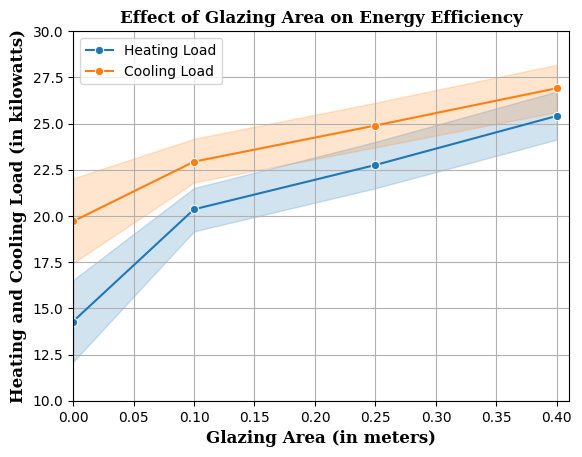

In [ ]:
sns.lineplot(data=energy, x="X7", y="Y1", label='Heating Load', marker='o')
sns.lineplot(data=energy, x="X7", y="Y2", label='Cooling Load', marker='o')
newfont = {'fontname': 'serif', 'fontsize': 12,'fontweight': 'bold'}
plt.xlim(0,.41)
plt.ylim(10,30)
plt.grid()
plt.title('Effect of Glazing Area on Energy Efficiency', fontdict=newfont)
plt.xlabel('Glazing Area (in meters)', fontdict=newfont)
plt.ylabel('Heating and Cooling Load (in kilowatts)', fontdict=newfont)
plt.legend(loc="upper left")
plt.show()

**note:**
 * **the glazing area for this dataset is the amount og area covered by windows or doors; this could affect the heating and cooling efficiency due to the low insulation.**

 * **the shading around the lines accounts for the same x value having multiple y values**


**Observations from graph:**

 * **The graph shows that an increase in glazing area causes an increase in the energy uses for both heating and cooling loads.**

 * **We want to minimize the number of doors and windows to cut down on energy usage.**

### **4. What is the ideal wall area for optimal heating and cooling load? (we find the midpoint of the heating and cooling load, and take the average wall area of the values that are less than the midpoint; in this case, the lower the number, the more energy efficient) - (data manipulation)**

Making an indicator column that is the midpoints of the heating and cooling load at each wall area:

In [ ]:
energy['midpoint'] = (energy['Y1']+energy['Y2'])/2

Graph showing the effect of wall area on energy efficiency:

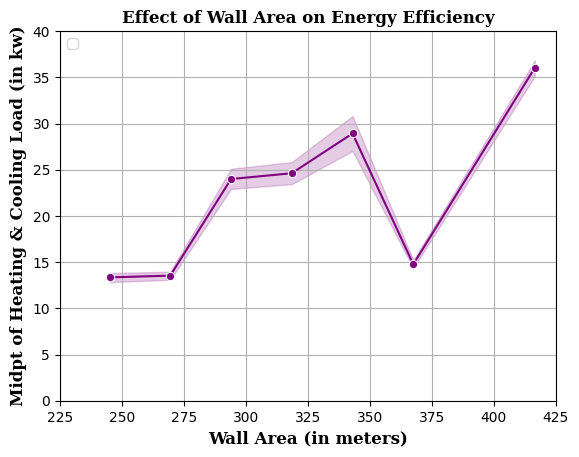

In [ ]:
sns.lineplot(data=energy, x="X3", y="midpoint", marker='o', color='purple')
newfont = {'fontname': 'serif', 'fontsize': 12,'fontweight': 'bold'}
plt.xlim(225,425)
plt.ylim(0,40)
plt.grid()
plt.title('Effect of Wall Area on Energy Efficiency', fontdict=newfont)
plt.xlabel('Wall Area (in meters)', fontdict=newfont)
plt.ylabel('Midpt of Heating & Cooling Load (in kw)', fontdict=newfont)
plt.legend(loc="upper left")
plt.show()

Finding the lowest midpoint between heating a cooling load:

In [ ]:
lowest = energy['midpoint'].min()
lowest

8.475

Finding the ideal wall area at the minimum heating at cooling load by locating the area of the wall at the midpoint of the lowest heating and cooling load:



In [ ]:
energy['X3'].loc[energy['midpoint']<=lowest]

,X3
26,245.0


**Thus, the ideal wall area for optimal heating and cooling load is 245 m^2.**

##**Conclusion:**

####**1.**

####**4. What is the ideal wall area for optimal heating and cooling load?**

The ideal wall area for optimal heating and cooling load is 245.0 m^2.

We found this by finding the midpoints of each data point's heating and cooling load. Then, we found the lowest midpoint and the wall's area at that point. This would be the ideal wall area to minimize the heating and cooling load of the building.

I believe that this analysis was effective. This dataset could have been improved by having more in-depth documentation of what each of the columns of the dataset represents. This would make this dataset significantly more user-friendly.
